# Classification model

**Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [2]:
df = pd.read_csv("DATA/mushrooms-final.csv")

**Split data into X feature columns and y label column**

In [3]:
X = df.drop(labels="class", axis=1)
y = df["class"]

**Encoder**

In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

**Estimator**

In [5]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()

**Pipeline**

In [6]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("encoder", encoder), 
    ("estimator", estimator)
    ])

**Train | Test Split**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Train the model**

In [8]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('encoder', OneHotEncoder()),
                ('estimator', LogisticRegression())])

**Evaluate the model**

In [9]:
y_pred = pipe.predict(X_test)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1049
           p       1.00      1.00      1.00       645

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



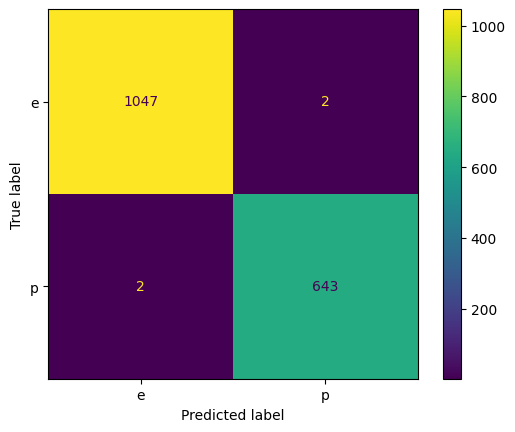

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

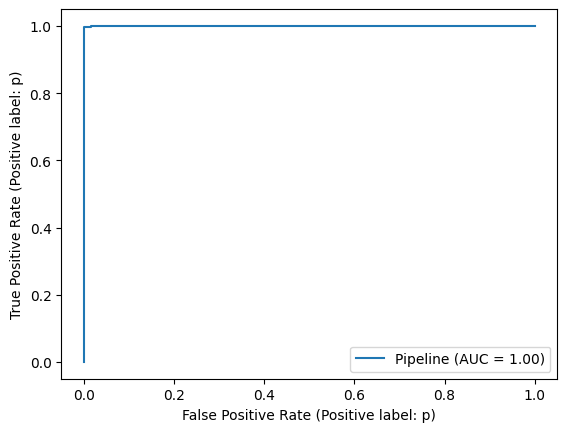

In [12]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipe, X_test, y_test)

**Saving the model**

In [13]:
pipe.fit(X, y)

Pipeline(steps=[('encoder', OneHotEncoder()),
                ('estimator', LogisticRegression())])

In [14]:
from joblib import dump
dump(pipe, '../model/model.joblib') 

['../model/model.joblib']